In [425]:
from netCDF4 import Dataset

import glob
from pathlib import Path

import numpy as np
from time import sleep
from matplotlib import pyplot as plt
from IPython import display

In [426]:
cmct_dir = Path('/home/jovyan/cmct-glas-data-errors/data/GLAS_Data/2005')

#def cmct_files(files: list):
g1 = [cmct_dir/'GLA12_634_2111_003_0127_0_01_0001.CMCT.final.nc', 
      cmct_dir/'GLA12_634_2111_003_0001_0_01_0001.CMCT.final.nc']
                # Files: 003_0127 x 003_0001
g2 = [cmct_dir/'GLA12_634_2111_003_0127_0_01_0001.CMCT.final.nc']
                # Files: 003_0127
g3 = [cmct_dir/'GLA12_634_2111_003_0001_0_01_0001.CMCT.final.nc']
                # Files: 003_0001
g4 = [cmct_dir/'GLA12_634_2111_003_0001_0_01_0001.CMCT.final.nc',
      cmct_dir/'GLA12_634_2111_002_0211_0_01_0001.CMCT.final.nc']
                # Files: 002_0211 x 003_0001
g5 = [cmct_dir/'GLA12_634_2113_001_1303_0_01_0001.CMCT.final.nc', 
      cmct_dir/'GLA12_634_2111_002_0113_0_01_0001.CMCT.final.nc']
                # Files: 001_1303 x 002_0113
g6 = [cmct_dir/'GLA12_634_2111_002_0113_0_01_0001.CMCT.final.nc']
                # File: 002_0113
g7 = [cmct_dir/'GLA12_634_2113_002_0127_0_01_0001.CMCT.final.nc']
                # File: 002_0127
g8 = [cmct_dir/'GLA12_634_2111_001_1317_0_01_0001.CMCT.final.nc']
                # File: 001_1317
g9 = [cmct_dir/'GLA12_634_2111_001_1317_0_01_0001.CMCT.final.nc', 
      cmct_dir/'GLA12_634_2111_003_0071_0_01_0001.CMCT.final.nc']
                # Files: 003_0071 x 001_1317
g10 = [cmct_dir/'GLA12_634_2111_002_0323_0_01_0001.CMCT.final.nc', 
       cmct_dir/'GLA12_634_2111_001_1317_0_01_0001.CMCT.final.nc']
                # Files: 002_0323 x 001_1317

In [427]:
groups = [g1, g2, g3, g4, g5, g6, g7, g8, g9, g10]

In [428]:
zoom_bounds = None
zoom_bounds = [310, 320, 75, 80]
#zoom_bounds = [312.0, 312.1, 78.05, 78.10]

In [429]:
def create_coords(files):
    LON_DEGE = list()
    LAT_DEGN = list()
    WGS84ELEV_M = list()
    DEM_M  = list()
    for i_file, file in enumerate(files):
        # print('plotting file {:4d} / {:4d}: {:s}'.format(i_file, len(cmct_files), cmct_file))
        ncfile = Dataset(file, 'r')
     
        if zoom_bounds:
            idx = (ncfile['LON_DEGE'][:] > zoom_bounds[0]) & (ncfile['LON_DEGE'][:] < zoom_bounds[1]) & \
                  (ncfile['LAT_DEGN'][:] > zoom_bounds[2]) & (ncfile['LAT_DEGN'][:] < zoom_bounds[3])
        else:
            idx = np.arange(len(ncfile['LON_DEGE'][:]))
    
        if np.sum(idx) > 0:
            LON_DEGE.extend(ncfile['LON_DEGE'][idx])
            LAT_DEGN.extend(ncfile['LAT_DEGN'][idx])
            WGS84ELEV_M.extend(ncfile['WGS84ELEV_M'][idx])
            DEM_M.extend(ncfile['DEM_M'][idx])
#             for i in np.where(idx)[0]:
#                 print('{:5.0f} {:5.0f} {:5.0f}'.format(ncfile['WGS84ELEV_M'][i], ncfile['DEM_M'][i], ncfile['WGS84ELEV_M'][i]-ncfile['DEM_M'][i]))
    
    LON_DEGE = np.array(LON_DEGE)
    LAT_DEGN = np.array(LAT_DEGN)
    WGS84ELEV_M = np.array(WGS84ELEV_M)
    DEM_M = np.array(DEM_M)
    
#     ax_height = fig_height.subplots()
#     ax_diff = fig_diff.subplots()
#     ax_dem = fig_dem.subplots()
    
    sc_diff   = ax_diff.scatter(LON_DEGE, LAT_DEGN, 3., c=WGS84ELEV_M-DEM_M, cmap='coolwarm', vmin=-100, vmax=+100)
    diff_cb = fig_diff.colorbar(sc_diff)
    
    return diff_cb

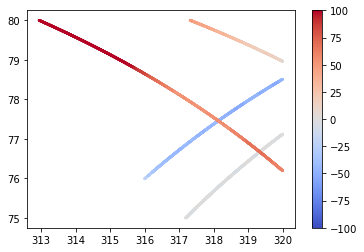

In [ ]:
fig_diff, ax_diff = plt.subplots()

for i, g in enumerate(groups):
    ax_diff.clear()
    
    print(f'group: {i}')
    
    cb = create_coords(g)

    display.clear_output(wait=True)
#     display.display(fig_height)
    display.display(fig_diff)
#     display.display(fig_dem)

    cont = input()
    
    if cont == 'n':
        break
    
    cb.remove()